# Diffraction des rayons X pour LiRhO₂ (mp-14115)

Ce notebook permet de déterminer les trois premiers pics du diffractogramme pour le matériau LiRhO₂ (identifiant `mp-14115`) en utilisant un rayonnement X incident Cu Kα de longueur d'onde λ = 1.54060 Å.

In [53]:
# Importation des bibliothèques nécessaires
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import pandas as pd

In [54]:
# Récupération de la structure
key = "SIW188zlPeNPO5kUv2cgLJFjL9GATHk3"  
material = "mp-14115"
m = MPRester(key)
struct = m.get_structure_by_material_id(material, conventional_unit_cell=True)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# Création d'un objet XRDCalculator
xrd = XRDCalculator(wavelength=1.54060)

In [56]:
# Calcul de la diffraction
diffraction_pattern = xrd.get_pattern(struct)

C:\Users\theom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pymatgen\analysis\diffraction\core.py:169: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.get_plot(structure, **kwargs).get_figure().show()


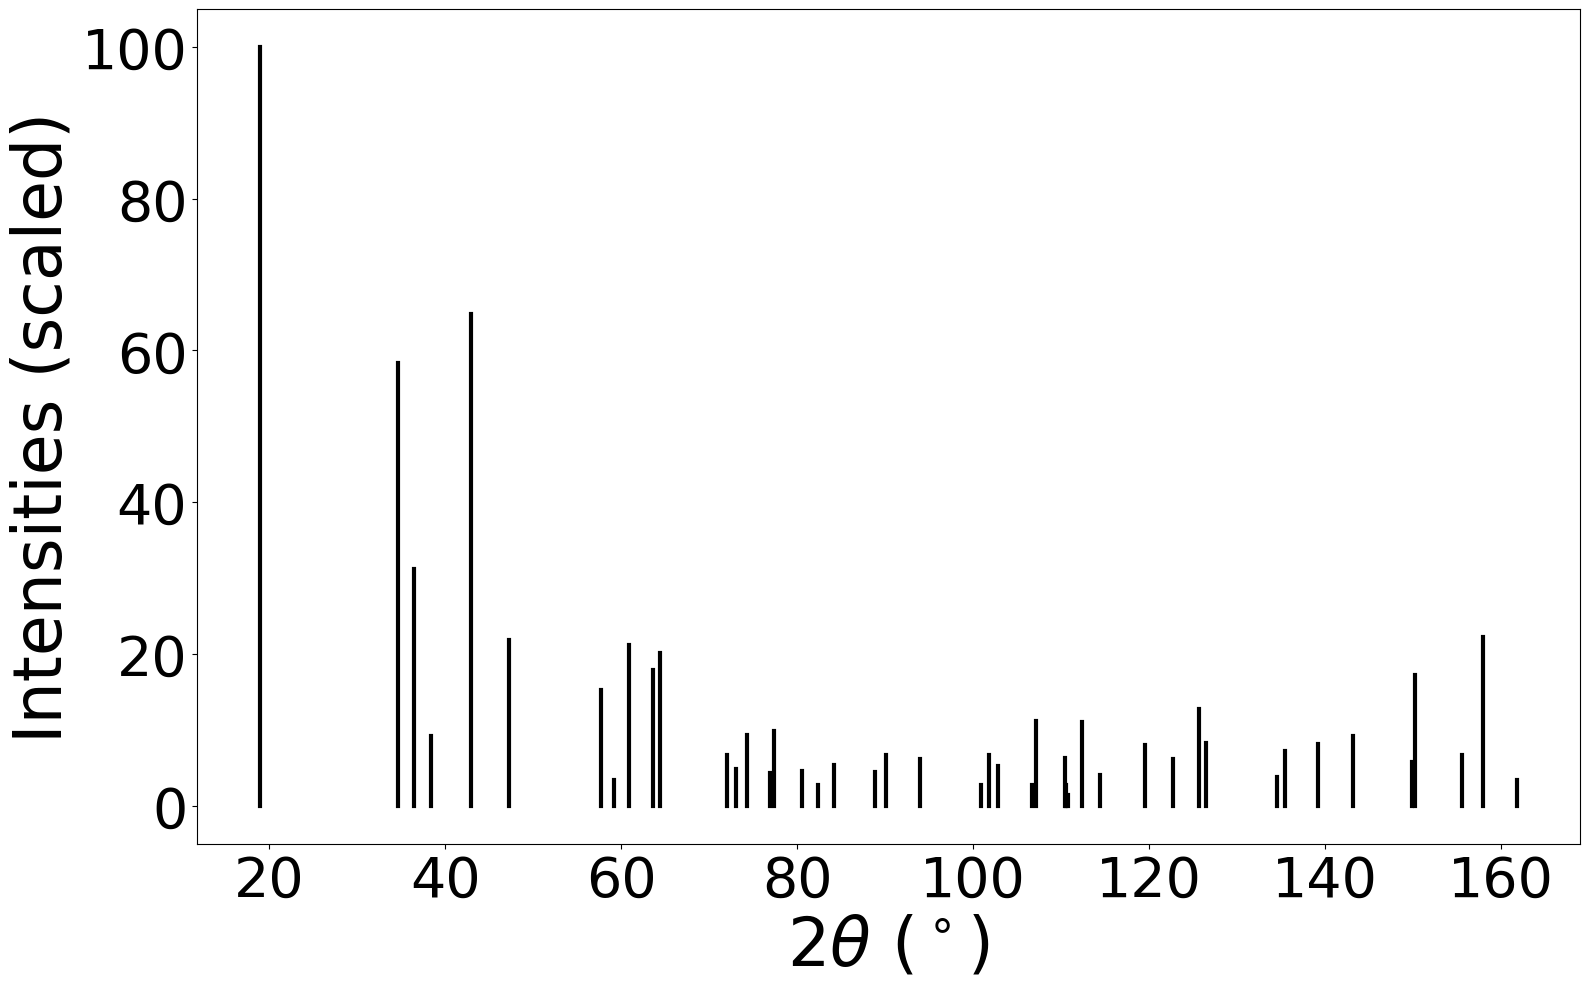

In [57]:
# Affichage du diffractogramme
xrd.show_plot(struct, annotate_peaks=False, two_theta_range=[0, 180])

In [ ]:
# Trier les pics par intensité décroissante
df_peaks_sorted = df_peaks.sort_values(by="Intensité", ascending=False)

# Sélectionner les trois premiers pics
top_3_peaks = df_peaks_sorted.head(3)

# Colonne pour le numéro du pic
top_3_peaks.insert(0, 'Numéro du pic', range(1, 1 + len(top_3_peaks)))

# Affichage
print(top_3_peaks.to_markdown(index=False))


|   Numéro du pic |      2θ |   Intensité | hkl           |   multiplicité |
|----------------:|--------:|------------:|:--------------|---------------:|
|               1 | 18.945  |    100      | (0, 0, 0, 3)  |              2 |
|               2 | 42.9028 |     64.7558 | (1, 0, -1, 4) |             12 |
|               3 | 34.6347 |     58.3122 | (1, 0, -1, 1) |             12 |


### Explication des résultats

- **Angle du pic (2θ)** : L'angle auquel le pic de diffraction est observé.
- **Intensité du pic** : L'intensité relative du pic, qui dépend de la structure atomique.
- **Indices hkl** : Les indices de Miller des plans cristallins responsables de la diffraction.
- **Multiplicité du pic** : Le nombre de plans équivalents qui contribuent au pic.